<a href="https://colab.research.google.com/github/manuvelloso/BearClassifier/blob/main/BearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.6 MB/s eta 0:00:00


In [3]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [4]:
urls = search_images('grizzly bear', max_images=1)
urls[0]

'https://cdn.britannica.com/18/161718-050-2DB34DD6/Grizzly-bear.jpg'

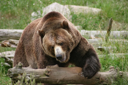

In [5]:
from fastdownload import download_url
dest = 'grizzly_bear.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(128,128)

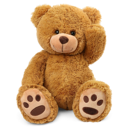

In [6]:
download_url(search_images('Teddy bear', max_images=1)[0], 'Teddy.jpg', show_progress=False)
Image.open('Teddy.jpg').to_thumb(128,128)

In [7]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')
if not path.exists():
    path.mkdir()
    for o in bear_types:
      dest = (path/o)
      dest.mkdir(exist_ok=True, parents=True)
      download_images(dest, urls=search_images(f'{o} bear'))

In [8]:
fns = get_image_files(path)
fns

(#470) [Path('bears/grizzly/9a3afd92-4091-44a5-9f1f-117fdeded5df.jpg'),Path('bears/grizzly/5e49d9a2-68e6-4824-a3e0-e3cf84452604.JPG'),Path('bears/grizzly/4584307b-87dd-4c1b-bc29-bcabad67e26f.jpg'),Path('bears/grizzly/415b3845-b6dc-42c5-9b19-b474a4c94806.jpg'),Path('bears/grizzly/4be5f9ba-9537-43e7-8024-ff817b7ab0a0.jpg'),Path('bears/grizzly/0a97002d-92dd-4c00-9ba4-cf61c1e5bb9e.jpg'),Path('bears/grizzly/5f4dff12-d796-42e6-8ffa-6b0b511418ba.jpg'),Path('bears/grizzly/866fa50e-ff81-4548-aa5c-dac7929fdb13.jpg'),Path('bears/grizzly/116347e3-2ed2-4f37-953e-cf99f39d7e19.jpg'),Path('bears/grizzly/9b7ae62a-9d43-4df0-a5f3-6c2c50ec19f3.jpeg'),Path('bears/grizzly/ef2bdd61-d9e2-4dee-bdd2-d5ee591e2aba.jpg'),Path('bears/grizzly/5c248392-6a4b-4d54-bdf8-cffc55739f5b.jpg'),Path('bears/grizzly/34b2f29c-242c-43cd-8205-97b489c75194.jpg'),Path('bears/grizzly/57538881-7430-4891-9600-169bca2e6642.jpg'),Path('bears/grizzly/50077774-617c-4f1e-aa03-754a14443b2f.jpg'),Path('bears/grizzly/47cf3542-16bf-4b5c-a2c9-e6

In [9]:
failed = verify_images(fns)
failed

(#29) [Path('bears/grizzly/5e49d9a2-68e6-4824-a3e0-e3cf84452604.JPG'),Path('bears/grizzly/893828d4-0b01-4e7d-9ce2-64e39375a434.jpg'),Path('bears/grizzly/84ed85fc-e712-4a76-b49f-427bd9a8f8d9.jpg'),Path('bears/grizzly/5cf7c256-2abb-473b-b082-9a24f2b57449.JPG'),Path('bears/grizzly/7fd1e0c2-25df-4c53-8d05-7a569082fb9c.jpg'),Path('bears/grizzly/fff86cf4-4dbe-40a6-8178-547bd1ea6aaf.jpg'),Path('bears/grizzly/c441f025-6380-43d4-8153-577ac1584fe7.jpg'),Path('bears/grizzly/d5b64188-2673-4ec2-a7bd-2e8e0e42f268.jpg'),Path('bears/grizzly/83bd7c8b-17dc-48ea-be34-346ba26a88af.jpg'),Path('bears/teddy/61044d1b-60f7-41e7-91f3-c4e2c3e7296b.jpg'),Path('bears/teddy/77fd07fd-1091-40de-ab2f-bbd616e505d5.jpg'),Path('bears/teddy/a43ca740-f467-4461-8cb8-c43bfb7db441.jpg'),Path('bears/teddy/2ee003f6-dea0-4601-b93c-62bf75419981.png'),Path('bears/teddy/baf82030-4886-43c5-a7e7-64fe8c94217f.jpg'),Path('bears/teddy/3abcce05-1780-40f6-bda3-09168cca2cc4.jpg'),Path('bears/teddy/e5ad00c5-e37a-4f88-a614-d48e6ad5b791.jpg')

In [10]:
failed.map(Path.unlink);

In [11]:
class DataLoader(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i,self: self[i])

In [12]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [13]:
blocks = (ImageBlock, CategoryBlock)
get_items = get_image_files
splitter = RandomSplitter(valid_pct=0.2, seed=42)
get_y = parent_label
item_tfms = Resize(128)

In [14]:
dls = bears.dataloaders(path)

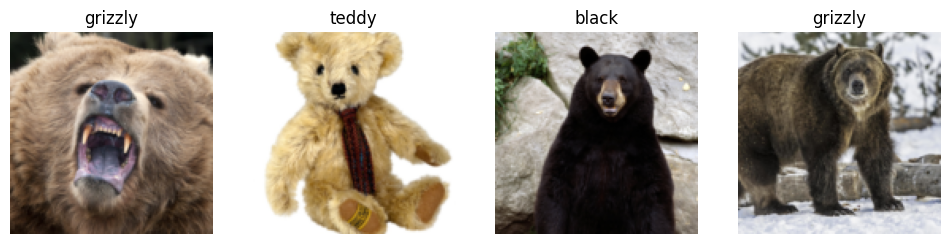

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

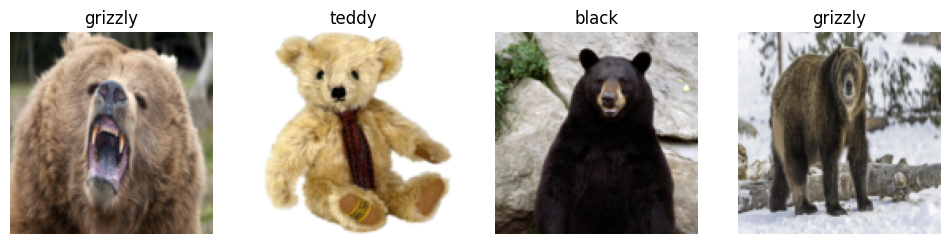

In [16]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

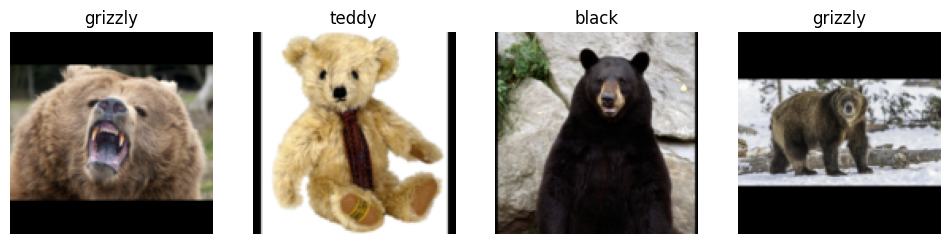

In [17]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

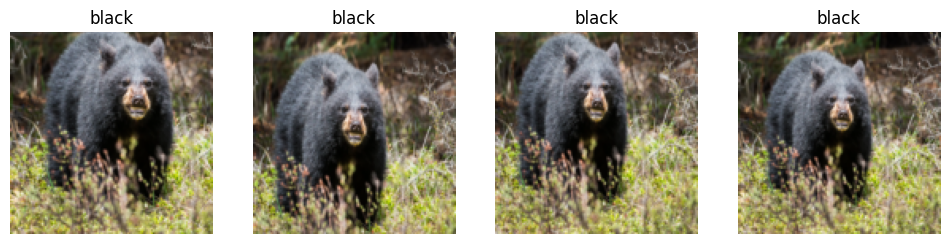

In [18]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

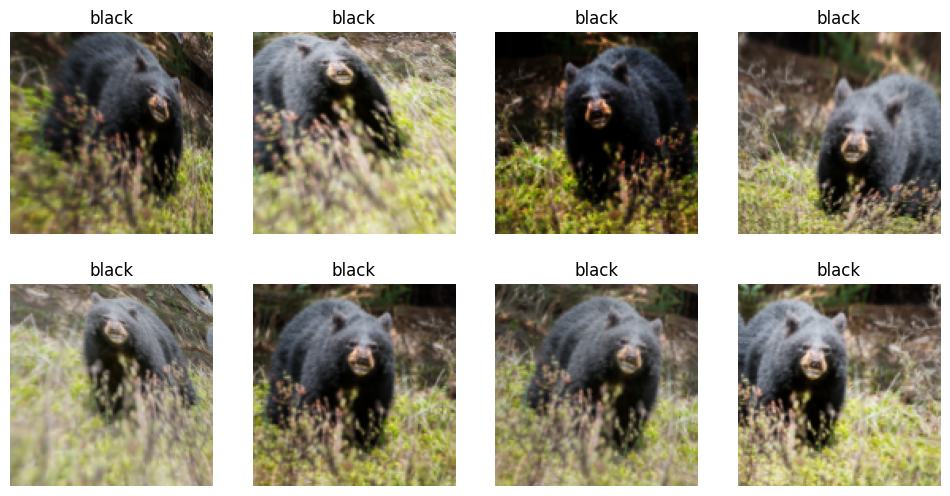

In [19]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [20]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [21]:
lear = cnn_learner(dls, resnet18, metrics=error_rate)
lear.fine_tune(4, freeze_epochs=3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.589042,0.608726,0.306818,00:27
1,0.954548,0.286819,0.079545,00:23
2,0.631623,0.407723,0.056818,00:24


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in by

epoch,train_loss,valid_loss,error_rate,time
0,0.057739,0.525112,0.045455,00:25
1,0.041725,0.545383,0.056818,00:24
2,0.038999,0.540600,0.056818,00:22
3,0.030422,0.481398,0.056818,00:24


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in by

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


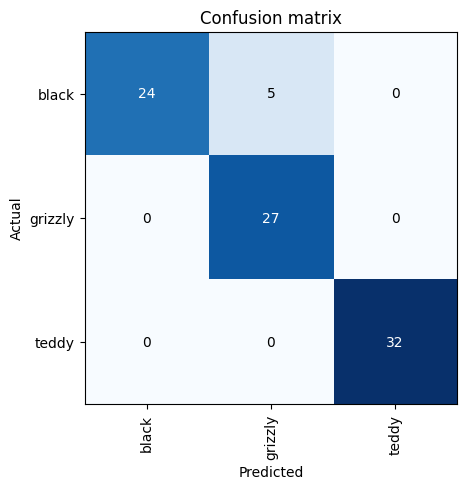

In [22]:
interp = ClassificationInterpretation.from_learner(lear)
interp.plot_confusion_matrix()

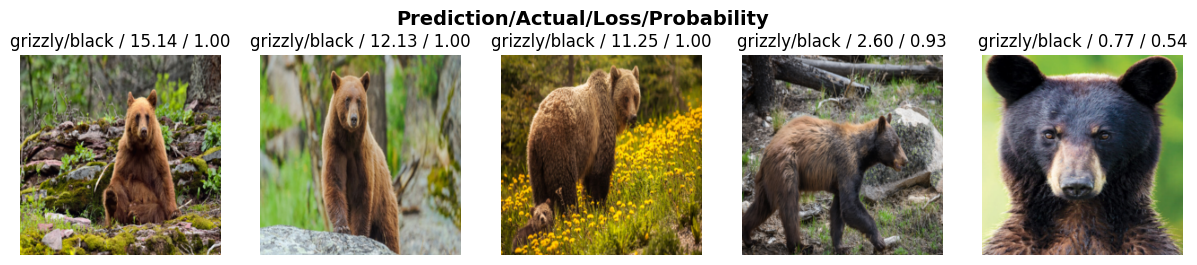

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
lear.export()

In [25]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('grizzly_bear.jpg')

('grizzly', tensor(1), tensor([6.8232e-08, 1.0000e+00, 8.6401e-10]))

In [27]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [29]:
import ipywidgets as widgets # Import the necessary module

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
img = PILImage.create(btn_upload.data[-1])

In [32]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [43]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [44]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [46]:
widgets.VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [47]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 6.5.5 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.3 which is incompatible.
Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.5.8 OK
